In [1]:
%load_ext autoreload
%autoreload 2

from fractions import Fraction

from ksvz_models.catalogue_creation import *
from ksvz_models.model_building import *

In [2]:
# Prepare Dyn and Cas

dicts = [{1:0,2:1/2,3:2,4:5,5:10,6:35/2,7:28,8:42},{1:0,3:1/2,6:5/2,8:3,10:15/2,15:10,152:35/2,21:35,24:25,27:27,28:63,35:105/2,36:105,42:119/2,45:165,48:98,55:495/2,60:115},{1:0,2:3/4,3:2,4:15/4,5:6,6:35/4,7:12,8:63/4},{1:0,3:4/3,6:10/3,8:3,10:6,15:16/3,152:28/3,21:40/3,24:25/3,27:8,28:126/7,35:12,36:70/3,42:34/3,45:88/3,48:49/3,55:36,60:46/3}]

for dict in dicts:
   d_new = {}
   for key in dict:
      d_new[key] = int(36*dict[key])
   print(d_new)

{1: 0, 2: 18, 3: 72, 4: 180, 5: 360, 6: 630, 7: 1008, 8: 1512}
{1: 0, 3: 18, 6: 90, 8: 108, 10: 270, 15: 360, 152: 630, 21: 1260, 24: 900, 27: 972, 28: 2268, 35: 1890, 36: 3780, 42: 2142, 45: 5940, 48: 3528, 55: 8910, 60: 4140}
{1: 0, 2: 27, 3: 72, 4: 135, 5: 216, 6: 315, 7: 432, 8: 567}
{1: 0, 3: 48, 6: 120, 8: 108, 10: 216, 15: 192, 152: 336, 21: 480, 24: 300, 27: 288, 28: 648, 35: 432, 36: 840, 42: 408, 45: 1056, 48: 588, 55: 1296, 60: 552}


In [3]:
print_replist()

[[  3   1  -2 ...  48   0   4]
 [  3   1   4 ...  48   0  16]
 [  3   2   1 ...  48  27   1]
 ...
 [ 21   2   1 ... 480  27   1]
 [  8   1  18 ... 108   0 324]
 [ 35   1  -6 ... 432   0  36]]


In [4]:
e, n = encalc_times_36(np.array([1], dtype=int), repinfo)
print(repinfo[0][:3], e, n, Fraction(e, n))

[ 3  1 -2] 12 18 2/3


/Users/sebhoof/Software/ksvz_axion_catalogue/ksvz_models/model_building.py:137: RuntimeWarning: invalid value encountered in sqrt
  g = np.sqrt(4*np.pi/sol.y)


LP = 9.32e+38 GeV (g_1) (should be 9.3e38 GeV and g_1)


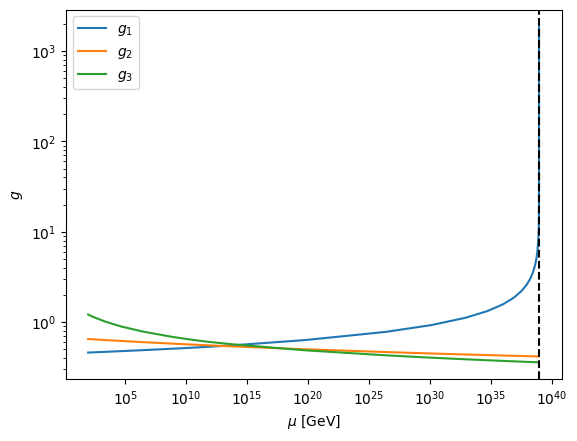

In [5]:
muLP, iLP = find_LP([1], mQ=5.0e11, plot=True)
print("LP = {:.2e} GeV (g_{:d}) (should be 9.3e38 GeV and g_1)".format(muLP,iLP+1))

In [6]:
save_initial_catalogue([5e11], range(1,21))

Created combinations for N_Q = 1...
Computed 20 models for N_Q = 1 with 1 mass(es) after 0.00 mins.
Created combinations for N_Q = 2...
Computed 210 models for N_Q = 2 with 1 mass(es) after 0.02 mins.


In [7]:
create_extended_catalogue(4)

  0%|          | 0/2 [00:00<?, ?it/s]

Computed 566 models for N_Q = 3 with 1 mass(es) after 0.05 mins.


 50%|█████     | 1/2 [00:03<00:03,  3.19s/it]

INFO. No Landau pole found below 7.78e+42 GeV; setting the LP scale to inf.
Computed 1441 models for N_Q = 4 with 1 mass(es) after 0.13 mins.


100%|██████████| 2/2 [00:11<00:00,  5.54s/it]

All tasks completed after 0.18 mins.


In [8]:
create_full_catalogue(4, verbose=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Reading file output/data/addNQ2_m0.h5 with 104 models to extend
Computed 104 models for N_Q = 2 with 1 mass(es) after 0.01 mins.


 33%|███▎      | 1/3 [00:00<00:00,  2.12it/s]

Reading file output/data/addNQ3_m0.h5 with 405 models to extend
Computed 1078 models for N_Q = 3 with 1 mass(es) after 0.00 mins.
Reading file output/data/addNQ4_m0.h5 with 1074 models to extend
Computed 6102 models for N_Q = 4 with 1 mass(es) after 0.00 mins.


100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

All tasks completed after 0.01 mins.
